<a href="https://colab.research.google.com/github/aliahalotaibi73/week7_exercises/blob/main/auto_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-Correction Tutorial

This tutorial will guide you through building an auto-correct system in Python. We'll use a text corpus to identify misspelled words and suggest corrections.

In [1]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk


## Auto-Correct Systems
The task of an auto-correct system is to identify misspelled words in a document and provide suggestions for correction.


![Auto-Correct System](https://github.com/pashupati98/kaggle-archives/blob/main/img/img2.PNG?raw=true)


## Data Requirement

We need a trusted text corpus that we'll use to build the auto-correct system. For this tutorial, we'll use a small corpus from Shakespeare's works.


In [2]:

# Load the corpus
with open('/content/shakespeare.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

# A small sample of the corpus
file[0][:3000]


'THE SONNETS\n'


## Data Processing

To process the corpus, we will tokenize the text and convert all characters to lowercase.


In [3]:

def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")


The first ten words in the text are: 
['the', 'sonnets', 'by', 'william', 'shakespeare', 'from', 'fairest', 'creatures', 'we', 'desire']
There are 3086 unique words in the vocabulary.


In [4]:
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_1 = process_data(file)
vocab = set(word_1)
print(f"The first ten words in the text are: \n{word_1[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary")

The first ten words in the text are: 
['the', 'sonnets', 'by', 'william', 'shakespeare', 'from', 'fairest', 'creatures', 'we', 'desire']
There are 3086 unique words in the vocabulary



## Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Checking if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggesting candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculating the probability of each candidate word.
4. **Replace Mispells**: Replacing the misspelled word with the most probable suggestion.


### Architecture Part 1: Filtering Mispells

In [12]:

def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('he is going home', vocab)


[]

In [11]:
def find_worng_word(sent, vocab):
    worng_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
           worng_words.append(word)
    return worng_words

find_worng_word('hee is goinng homme', vocab)

['hee', 'goinng', 'homme']

### Architecture Part 2: Word Suggestion Mechanism

In [13]:

def delete_letter(word, verbose=False):
    delete_l = []
    # split the word at every possible position
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="cans", verbose=True)


input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [15]:
def delete_letter(word, verbose=False):
    delete_1 = []
    split_1 = [(word[:i], word[i:]) for i in range(len(word))]
    delete_1 = [s[0]+s[1][1:] for s in split_1]
    if verbose: print(f"input word : {word} \nsplit_1 = {split_1}, \ndelete_1 = {delete_1}")
    return delete_1

delete_word_1 = delete_letter(word="cans", verbose=True)

input word : cans 
split_1 = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_1 = ['ans', 'cns', 'cas', 'can']


In [14]:

def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="eta", verbose=True)


Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [16]:

def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='can', verbose=True)


Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l = ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [17]:

def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")


Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


### Combining Functions for Word Suggestions

In [20]:

def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [19]:
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_1 = insert_letter(word)
    delete_1 = delete_letter(word)
    replace_1 = replace_letter(word)
    switch_1 = switch_letter(word)
    if allow_switches:
       ans = insert_1 + delete_1 + replace_1 + switch_1
    else:
      ans = insert_1 + delete_1 + replace_1
    edit_one_set = set(ans)
    return edit_one_set

In [21]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

Number of outputs from edit_one_letter('at') is 129


In [22]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [25]:
def edit_two_letters(word, allow_switches = True):

  edit_two_set = set()
  one_edit = edit_one_letter(word)
  ans = []

  for w in one_edit:
    ans.append(w)
    ans.extend(edit_one_letter(w))

  edit_two_set = set(ans)

  return edit_two_set

In [23]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


### Architecture Part 3: Probability Distribution

In [28]:

def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print("an example key pair:", word_count_dict)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")


an example key pair: Counter({'and': 490, 'the': 432, 'to': 414, 'my': 393, 'of': 370, 'i': 351, 'that': 323, 'in': 323, 'thy': 287, 'thou': 235, 's': 202, 'love': 194, 'with': 181, 'for': 172, 'is': 170, 'not': 167, 'a': 164, 'me': 164, 'but': 163, 'thee': 162, 'so': 145, 'be': 142, 'as': 121, 'all': 120, 'you': 112, 'it': 111, 'which': 108, 'his': 107, 'when': 106, 'this': 105, 'your': 100, 'by': 94, 'self': 88, 'doth': 88, 'do': 84, 'from': 82, 'on': 80, 'or': 79, 'no': 79, 'have': 77, 'then': 74, 'what': 73, 'beauty': 70, 'time': 70, 'are': 69, 'if': 68, 'o': 65, 'will': 64, 'more': 64, 'mine': 63, 'their': 63, 'shall': 59, 'heart': 58, 'sweet': 57, 'eyes': 53, 'st': 52, 'art': 52, 'nor': 52, 'they': 52, 'her': 51, 'yet': 51, 'than': 48, 'now': 46, 'should': 44, 'thine': 44, 'fair': 44, 'he': 44, 'can': 44, 'make': 43, 'one': 43, 'hath': 43, 'where': 41, 'still': 41, 'how': 40, 'eye': 40, 'him': 38, 'true': 38, 'like': 36, 'see': 35, 'am': 35, 'world': 33, 'she': 33, 'those': 33, '

In [29]:

def get_probs(word_count_dict):
    probs = {} #empty set or dic
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total #word_count_dict[word] is the (and : 490) in the dic
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('you') is {probs['you']:.4f}")


Length of probs is 3086
P('you') is 0.0062


In [35]:
def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('of') is {probs['of']:.4f}")

Length of probs is 3086
P('of') is 0.0206


<Axes: xlabel='word'>

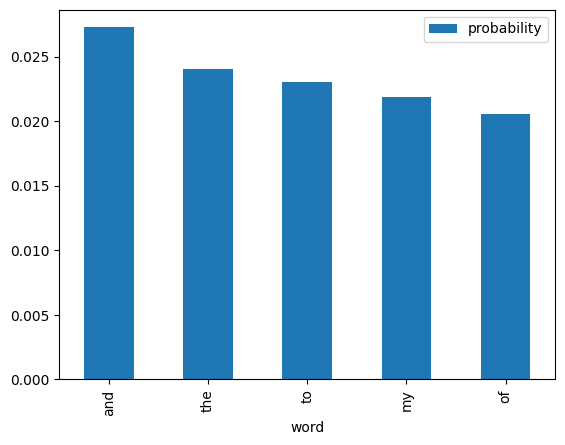

In [36]:

# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')


### Architecture Part 4: Replace Misspells with Correction

In [38]:

def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = [] # to store possible correction
    n_best = [] # store the best suggestions based on thier probs

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0: # if no correction are founf, it return the orihinal word
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word
# vocab = Set of Unique words in the shakespeare text
get_correct_word('goinng', vocab, probs, 100)


'doing'

## Final Auto-Correction Function

In [39]:

def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())



##Demo

In [40]:
autocorrect("he is goinng well", vocab, probs)


Input sentence :  he is goinng well
Wrong words :  ['goinng']
Output Sentence :  He is doing well


In [41]:
autocorrect("honsty is the best pooliccy", vocab, probs)


Input sentence :  honsty is the best pooliccy
Wrong words :  ['honsty', 'pooliccy']
Output Sentence :  Honey is the best policy


In [42]:
autocorrect("life is a diink annd lve is a druug", vocab, probs)

Input sentence :  life is a diink annd lve is a druug
Wrong words :  ['diink', 'annd', 'lve', 'druug']
Output Sentence :  Life is a think and love is a drudge


[Source](https://www.kaggle.com/code/pashupatigupta/project-statistical-auto-correct-system#Auto-correct-systems) for this tutorial.